# Model for Oligosaccharide degradation under various enzymes 

In [388]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pprint import pprint
import random


In [389]:
class enzyme:
    def __init__(self, name, kind = None):
        self.name = name
        self.kind = kind   #useless
#    def act(self,liste):
#        pass
    
    
class structure:
    def __init__(self, chain_length_A, chain_length_B):
        self.dpa = chain_length_A
        self.dpb = chain_length_B
        
        #attribute location correspond to the glucose position of the branch
        ## In the current exemple, if the B chain goes from glucose 1 to n, we select a glucose unit in the range
        ## [2,n-1] excluding therefore the reducing and non reducing end
        self.location = random.randint(2, chain_length_B - 1)       

#### Enzyme object creation

Creation of an enzyme called ```Pul``` with name ```'pululanase'``` and type ```'degrading'```.

add attributes ``` dp_cleave = 2; ``` which corresponds to the number of glucose cleaved by  pululanase,
and ``` distance_to_stop = 3; ``` which corresponds to the distance from a branch where it can react. 

<br>
<font color='red'>  The following two values can be changed:  </font> 

In [390]:
Pul = enzyme('pululanase', 'degrading')
Pul.dp_cleave = 2;
Pul.distance_to_stop = 3;

In [404]:
Pygl = enzyme('glycogen_phosphorilase', 'degrading')
Pygl.dp_cleave = 1
Pygl.distance_to_stop = 4

<br>
Creation of a method that will be add to the enzyme ``` Pul ```.
The method consist in taking a structure called here ```config``` and to reduce it, according to pululanase attributes:

In [391]:
def act_pull(config):
    while config.dpa > Pul.distance_to_stop :
        config.dpa = config.dpa - Pul.dp_cleave
    while config.dpb - config.location > Pul.distance_to_stop :
        config.dpb = config.dpb - Pul.dp_cleave
        
Pul.act = act_pull

#### Generate chains and degradation

Create ```N``` configurations and reduced it by the chosen enzyme.
Store dpa (degree of polymerisation of the A chain) and dpb (same) after degradation in a list called ```DP_list```.
Equivalent as applying ISOAMYLASE.

<br>
<font color='red'>  Xa, Xb can be changed:  </font> 



In [399]:
Xa,Xb = 6,9

DP_list = []; N=1000
for k in range(N):
    local_config = structure(Xa,Xb)
    #print('before : ',local_config.dpa,local_config.dpb,local_config.location)
    Pul.act(local_config)
    DP_list.extend([local_config.dpa,local_config.dpb])
    #print('after : ',local_config.dpa,local_config.dpb,local_config.location)
    #print('')
    del local_config

### Plot of the results


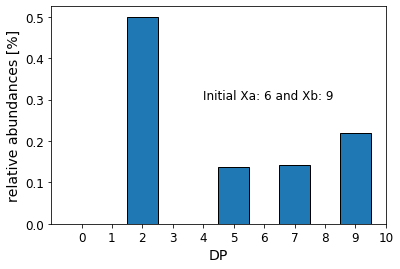

In [403]:
bins1 = np.linspace(0, max(DP_list)+1 , max(DP_list)+2)

plt.figure()
plt.hist(DP_list, bins = bins1, density = 1 ,edgecolor = 'black', align='left')
plt.xlabel('DP',fontsize = 14), plt.ylabel('relative abundances [%]',fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize = 12)
plt.text(4, 0.3, 'Initial Xa: '+str(Xa)+' and Xb: '+str(Xb),fontsize = 12)
plt.xticks(bins1)
plt.show()

